In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import h5py
import cv2
import os 

In [48]:
# Load Salvus data
path = "../NoCrack/Simple_Homogeneous_Moseley/Event0000/output.h5"
hf = h5py.File(path, 'r')

# Create output dir 
dir_name = 'Simple_Homogeneous_Moseley/'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

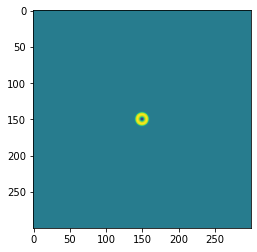

In [36]:
# # # Small data
timestep = 10

df_test = pd.DataFrame()
df_test['X'] = hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_test['Y'] = hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)
df_test['T'] = timestep
df_test['True'] = hf['volume']['phi'][timestep][:,0].mean(axis=1)

# Pivot Table to reorder the data
df_show = df_test.pivot_table(values='True',index='Y',columns='X').sort_index(axis=0,ascending=False)

# Plot
plt.imshow(df_show.values)

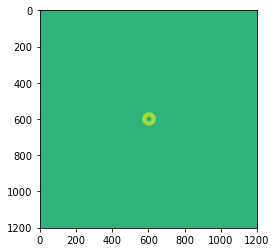

In [38]:
# # # Big data
timestep = 10

df_test = pd.DataFrame()
df_test['X'] = hf['coordinates_ACOUSTIC'][:][:,:,0].flatten()
df_test['Y'] = hf['coordinates_ACOUSTIC'][:][:,:,1].flatten()
df_test['X'] = np.round(df_test['X'],5)
df_test['Y'] = np.round(df_test['Y'],5)

df_test['T'] = timestep
df_test['True'] = hf['volume']['phi'][timestep][:,:,:25].flatten()

# Pivot Table to reorder the data
df_show = df_test.pivot_table(values='True',index='Y',columns='X').sort_index(axis=0,ascending=False)

# Plot
plt.imshow(df_show.values)

In [49]:
# CSV to store figure name
csv_name = pd.DataFrame()

# CSV to store figure
df_figure = pd.DataFrame()
df_figure['X'] = hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_figure['Y'] = hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)

for i,fig_i in enumerate(range(10,200)):
    # Add pressure
    df_figure['Pressure'] = hf['volume']['phi'][fig_i][:,0].mean(axis=1)

    # Pivot Table to reorder the data
    df_show = df_figure.pivot_table(values='Pressure',index='Y',columns='X').sort_index(axis=0,ascending=False)

    name = f'Simple_Homogeneous_Moseley_Event0000_{fig_i}.tiff'
    name_next = f'Simple_Homogeneous_Moseley_Event0000_{fig_i+1}.tiff'

    # Save figure
    cv2.imwrite(dir_name + name,df_show.values)

    csv_name.loc[i,'x'] = name
    csv_name.loc[i,'y'] = name_next

# Save last figure
df_show = df_figure.pivot_table(values='Pressure',index='Y',columns='X').sort_index(axis=0,ascending=False)
name = f'Simple_Homogeneous_Moseley_Event0000_{200}.tiff'
cv2.imwrite(dir_name + name,df_show.values)

# Save csv with figure name
csv_name.to_csv('Simple_Homogeneous_Moseley_Event0000.csv')